# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
from scipy.stats import t
import matplotlib.pyplot as plt

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                 'address_raw',
                                                 'bfs_number',
                                                 'bfs_name',
                                                 'rooms', 
                                                 'area', 
                                                 'luxurious', 
                                                 'price', 
                                                 'price_per_m2',
                                                 'pop_dens',
                                                 'frg_pct']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",112,Bubikon,3.5,122,1,3180,26.07,632.558140,11.410675
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",112,Bubikon,4.0,87,0,1690,19.43,632.558140,11.410675
2,1662023745-834,"8608 Bubikon, ZH",112,Bubikon,3.5,92,0,2350,25.54,632.558140,11.410675
3,1662023701-503,"8608 Bubikon, ZH",112,Bubikon,3.5,130,0,2500,19.23,632.558140,11.410675
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",261,Zürich,2.5,78,0,3760,48.21,4778.994655,32.458468


### Filter apartments

In [3]:
df_orig.quantile(q=[0.01,0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)
df_orig.quantile([.1, .25, .5, .75], axis = 0).round(2)

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0.10,55.0,1.5,49.0,0.0,1480.90,19.18,525.66,18.20
0.25,115.5,2.5,65.0,0.0,1721.25,21.75,745.77,23.01
0.50,224.5,3.5,82.0,0.0,2090.00,25.47,1486.62,25.99
0.75,261.0,4.5,100.0,0.0,2600.00,32.01,3759.21,32.46


In [4]:
# lower_quantile, upper_quantile = df_orig.quantile([.01, .11])
# Replace the 5000 below by the 10% quantile or 90% quantile to filter apartments
# The difference is, that if we use the 90%-quantil, the result is only zürich - which means, In the normal distribution, Zurich would be an outlier and the distribution would tend to be left-skewed in the first 10% quantile.
df = df_orig.loc[df_orig['pop_dens'] <= df_orig['pop_dens'].quantile(.1)]

np.array(pd.Categorical(df['bfs_name']).categories)


array(['Andelfingen', 'Bauma', 'Berg am Irchel', 'Boppelsen', 'Brütten',
       'Bäretswil', 'Dägerlen', 'Dättlikon', 'Elgg', 'Elsau',
       'Glattfelden', 'Hausen am Albis', 'Hinwil', 'Hittnau',
       'Hochfelden', 'Kappel am Albis', 'Knonau', 'Laufen-Uhwiesen',
       'Lindau', 'Lufingen', 'Maschwanden', 'Mettmenstetten',
       'Mönchaltorf', 'Neerach', 'Niederweningen', 'Oberweningen',
       'Otelfingen', 'Rafz', 'Rheinau', 'Rickenbach (ZH)', 'Russikon',
       'Schlatt (ZH)', 'Seegräben', 'Stadel', 'Stammheim', 'Steinmaur',
       'Turbenthal', 'Wald (ZH)', 'Weiach', 'Weisslingen', 'Wiesendangen',
       'Wil (ZH)', 'Zell (ZH)'], dtype=object)

In [5]:
df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]),
                   columns=['a', 'b'])
df.quantile(.1)
df.quantile([.1, .5])

,a,b
0.1,1.3,3.7
0.5,2.5,55.0


In [6]:
# lower_quantile, upper_quantile = df_orig.quantile([.01, .11])
# Replace the 5000 below by the 10% quantile or 90% quantile to filter apartments
df = df_orig.loc[df_orig['pop_dens'] <= df_orig['pop_dens'].quantile(.1)]

np.array(pd.Categorical(df['bfs_name']).categories)


array(['Andelfingen', 'Bauma', 'Berg am Irchel', 'Boppelsen', 'Brütten',
       'Bäretswil', 'Dägerlen', 'Dättlikon', 'Elgg', 'Elsau',
       'Glattfelden', 'Hausen am Albis', 'Hinwil', 'Hittnau',
       'Hochfelden', 'Kappel am Albis', 'Knonau', 'Laufen-Uhwiesen',
       'Lindau', 'Lufingen', 'Maschwanden', 'Mettmenstetten',
       'Mönchaltorf', 'Neerach', 'Niederweningen', 'Oberweningen',
       'Otelfingen', 'Rafz', 'Rheinau', 'Rickenbach (ZH)', 'Russikon',
       'Schlatt (ZH)', 'Seegräben', 'Stadel', 'Stammheim', 'Steinmaur',
       'Turbenthal', 'Wald (ZH)', 'Weiach', 'Weisslingen', 'Wiesendangen',
       'Wil (ZH)', 'Zell (ZH)'], dtype=object)

### Shape (number of rows and colums)

In [7]:
# Number of rows and columns
print(df.shape)

(88, 11)


### Data types

In [8]:
df.dtypes

web-scraper-order     object
address_raw           object
bfs_number             int64
bfs_name              object
rooms                float64
area                   int64
luxurious              int64
price                  int64
price_per_m2         float64
pop_dens             float64
frg_pct              float64
dtype: object

### Summary statistics of numeric variables

In [9]:
df.describe() #everything relevant

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
count,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,129.386364,3.630682,96.37500,0.034091,1956.556818,21.534659,331.218983,16.338857
std,92.522931,1.015666,39.38385,0.182503,480.205341,4.487616,127.571539,5.545162
min,4.000000,1.500000,25.00000,0.000000,895.000000,11.060000,82.310984,7.547170
25%,62.000000,3.000000,72.75000,0.000000,1650.000000,18.700000,201.628771,12.868217
50%,106.500000,3.500000,91.50000,0.000000,1880.000000,21.650000,352.795561,15.534578
75%,213.000000,4.500000,110.00000,0.000000,2210.000000,23.885000,436.423221,20.386559
max,298.000000,9.000000,300.00000,1.000000,4000.000000,39.600000,525.662252,27.126628


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [10]:
# Price (manually)
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 88 Min: 895 Max: 4000 Mean: 1956.6 Median: 1880.0 Std: 480.2
Area: Count: 88 Min: 25 Max: 300 Mean: 96.4 Median: 91.5 Std: 39.4


### Quantiles

In [11]:
df.quantile(q=[0.01,0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2) # the pop:dens is a dendity-parameter 
# we find the larger cities in the 0.75-0.95 parts , and the more rural part 0.01-0.05
# we have a 0.10 quantile, which means, that we have  4778.99 people per square meter in zürich

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0.01,5.74,1.50,43.27,0.0,977.65,12.63,87.23,7.55
0.05,8.00,2.18,54.00,0.0,1363.50,14.69,137.53,8.08
0.10,9.00,2.50,59.70,0.0,1417.00,16.54,152.13,8.93
0.25,62.00,3.00,72.75,0.0,1650.00,18.70,201.63,12.87
0.50,106.50,3.50,91.50,0.0,1880.00,21.65,352.80,15.53
0.75,213.00,4.50,110.00,0.0,2210.00,23.88,436.42,20.39
0.90,294.90,4.50,130.00,0.0,2514.30,27.26,506.15,24.54
0.95,297.65,4.50,144.55,0.0,2795.50,28.58,510.97,26.56


### Skewness

In [12]:
df.skew()

bfs_number      0.525408
rooms           1.369462
area            2.536361
luxurious       5.224519
price           1.019273
price_per_m2    0.689903
pop_dens       -0.270064
frg_pct         0.267699
dtype: float64

### Kurtosis

In [13]:
#Steilheit der Normalverteilung
df.kurtosis()

bfs_number      -0.842101
rooms            7.926170
area            10.889909
luxurious       25.883486
price            3.003105
price_per_m2     2.189812
pop_dens        -1.168209
frg_pct         -0.799839
dtype: float64

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [14]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.5,9.0
luxurious,,,,,,,,,
0,2,1,10,10,27,8,25,1,1
1,1,1,1,0,0,0,0,0,0


### Pivot tables

In [15]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area']],
               index=['rooms'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=np.mean)

,area,price,price_per_m2
rooms,,,
1.5,117.666667,1818.666667,25.303333
2.0,82.000000,1522.500000,18.060000
2.5,69.545455,1784.090909,26.347273
3.0,74.200000,1574.500000,22.395000
3.5,88.925926,1940.629630,22.041852
4.0,91.500000,1769.375000,19.830000
4.5,114.480000,2221.760000,19.540400
5.5,162.000000,2210.000000,13.640000
9.0,300.000000,4000.000000,13.330000


### Correlation matrix

In [16]:
#we should look at the signs - neagtive or positive correlated
corr = df.corr()
corr

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
bfs_number,1.000000,0.043979,0.014514,-0.100853,0.122631,0.022611,-0.094828,-0.276439
rooms,0.043979,1.000000,0.576335,-0.303355,0.555333,-0.471627,-0.100345,-0.034688
area,0.014514,0.576335,1.000000,0.262063,0.810226,-0.680325,-0.180435,-0.073868
luxurious,-0.100853,-0.303355,0.262063,1.000000,0.168971,-0.091701,0.016125,0.028054
price,0.122631,0.555333,0.810226,0.168971,1.000000,-0.276652,-0.069113,-0.301139
price_per_m2,0.022611,-0.471627,-0.680325,-0.091701,-0.276652,1.000000,0.169661,-0.050738
pop_dens,-0.094828,-0.100345,-0.180435,0.016125,-0.069113,0.169661,1.000000,0.360890
frg_pct,-0.276439,-0.034688,-0.073868,0.028054,-0.301139,-0.050738,0.360890,1.000000


### Covariance matrix

In [17]:
# also negative or positve related ; but we can also see, if we have very high or low values
# standardisation: (xi - xquer) / ( sd(x))
cov = df.cov()
cov

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
bfs_number,8560.492685,4.132837,52.887931,-1.702978,5448.483542,9.388294,-1119.283452,-141.828533
rooms,4.132837,1.031577,23.053879,-0.056230,270.851685,-2.149639,-13.001714,-0.195363
area,52.887931,23.053879,1551.087644,1.883621,15323.271552,-120.240388,-906.552002,-16.132019
luxurious,-1.702978,-0.056230,1.883621,0.033307,14.808386,-0.075103,0.375430,0.028391
price,5448.483542,270.851685,15323.271552,14.808386,230597.169148,-596.178946,-4233.926398,-801.878340
price_per_m2,9.388294,-2.149639,-120.240388,-0.075103,-596.178946,20.138694,97.129719,-1.262595
pop_dens,-1119.283452,-13.001714,-906.552002,0.375430,-4233.926398,97.129719,16274.497476,255.295009
frg_pct,-141.828533,-0.195363,-16.132019,0.028391,-801.878340,-1.262595,255.295009,30.748817


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

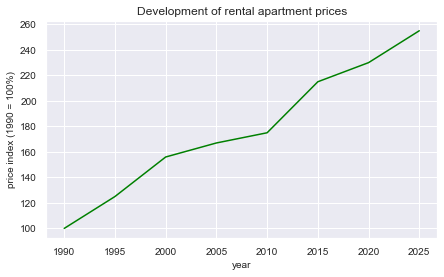

In [18]:
# Generate some useful values (time series)
#example data:
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<AxesSubplot: xlabel='price_per_m2'>

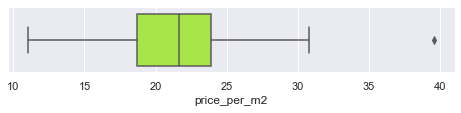

In [19]:
#matplotlib has no boxplot, so we use seaborn
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price_per_m2'], color="greenyellow") #the vector is called price # the colour is greenyellow

<AxesSubplot: xlabel='area'>

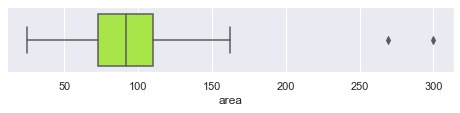

In [20]:
#boxplot of areas
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow") #the vector is called area # the colour is greenyellow

### Histogram  (matplotlib)

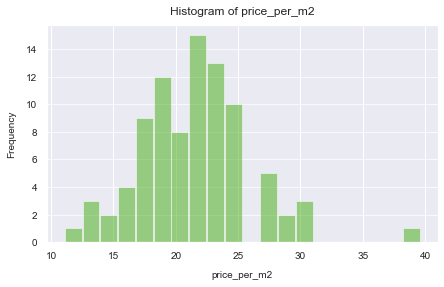

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price_per_m2'],   #this is a bin-element (breite der balken)
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

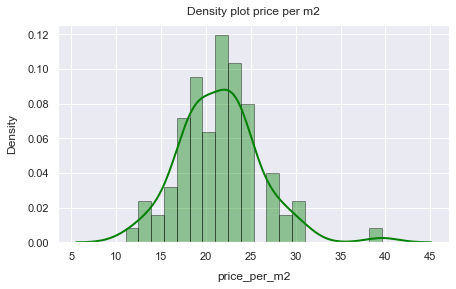

In [22]:
#under the green graph we have the area that represents the density
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

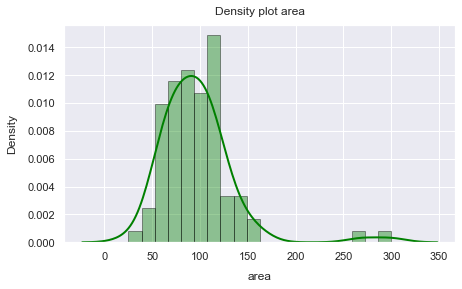

In [23]:
#under the green graph we have the area that represents the density
plt.figure(figsize=(7,4))
sns.distplot(df['area'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot area', fontsize=12, pad=10)
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

     area       var
845    25 -1.812291
653    46 -1.279078
730    50 -1.177513
652    50 -1.177513
841    54 -1.075949
..    ...       ...
780   147  1.285425
808   160  1.615510
859   162  1.666292
654   269  4.383142
851   300  5.170266

[88 rows x 2 columns]


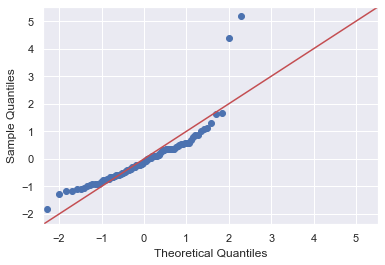

In [24]:
# Variable (standardized)
# its not completely on the line so maybe we have a right/left skewed graph
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

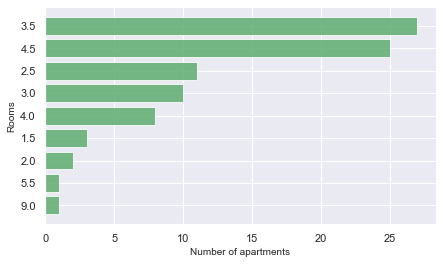

In [25]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, labels=index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

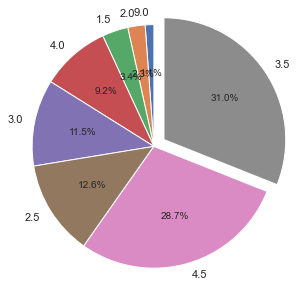

In [26]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0, 0, 0, 0.1) # increases distance of the piece that is apart

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

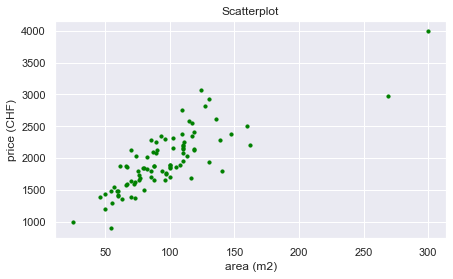

In [27]:
# we can see if there is a relation
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(86, 12)
9.510799512280089
1050.9565406723568


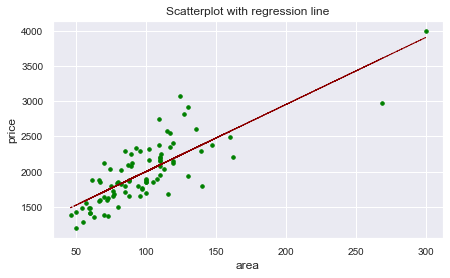

In [28]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line - so we see the direction and steigung a little bit better
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

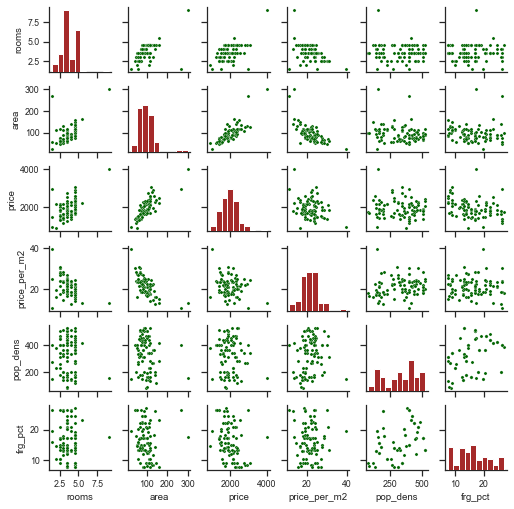

In [29]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(86, 12)


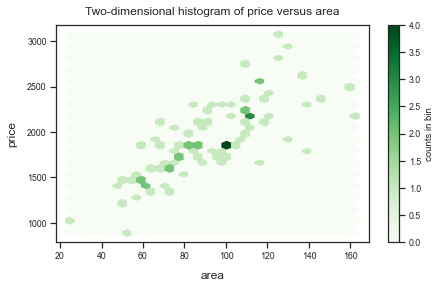

In [30]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<AxesSubplot: >

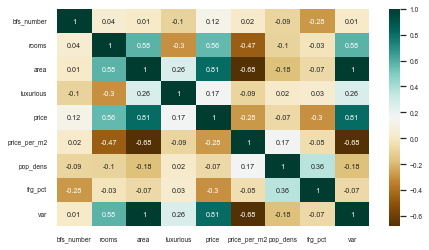

In [31]:
# Correlation: the larger the living area, the larger are the rooms
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df.corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

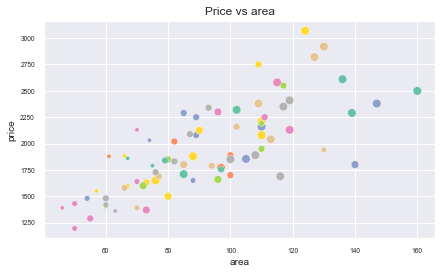

In [32]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

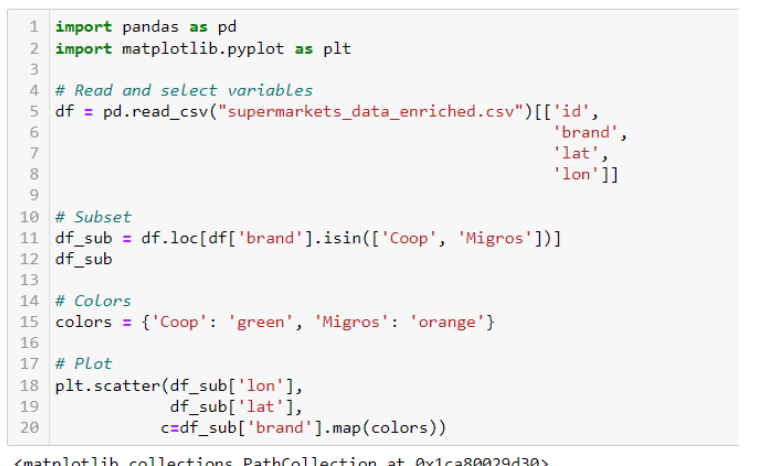

## Task 3 : 

#### Use the pandas library to import the file ‘supermarkets_data_enriched.csv’ from the materials for exercises folder on Moodle.

In [33]:
df = pd.read_csv("supermarkets_data_enriched.csv")

#### Use EDA methods: Count the number of supermarkets per brand 

In [34]:
df['brand'].value_counts()

Coop                                     497
Migros                                   495
Denner                                   423
Volg                                     210
ALDI                                      72
Spar                                      63
Lidl                                      58
Aldi                                      52
VOI Migros Partner                        44
Landi                                     39
Alnatura                                  15
Migros-Outlet                             12
VOI                                        8
Pam                                        4
Jumbo                                      2
Crai                                       2
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Eurospar                                   1
Proxi                                      1
Denner;Migros                              1
gazi      

#### Create a summary statistics of the numeric variables lat, lon, pop, pop_dens, frg_pct, emp

In [35]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['lat',
                                                 'lon',
                                                 'pop',
                                                 'pop_dens',
                                                 'frg_pct', 
                                                 'emp']]

df.describe()

,Unnamed: 0,id,lat,lon,addr:postcode,index_right,bfs_number,pop,pop_dens,frg_pct,emp
count,3242.000000,3.242000e+03,3242.000000,3242.000000,1521.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3197.000000
mean,1620.500000,3.442647e+09,47.030054,8.048040,5905.124260,725.929673,2796.906231,49072.576496,1756.157512,25.766721,50664.020019
std,936.029113,2.806306e+09,0.456972,0.896494,2595.574043,589.096329,2217.015904,97651.948301,2419.704592,10.582589,114085.602712
min,0.000000,3.312652e+07,45.834489,6.060400,1003.000000,0.000000,2.000000,125.000000,1.264625,0.000000,29.000000
25%,810.250000,8.872562e+08,46.759290,7.436646,3777.000000,246.000000,387.000000,4249.000000,290.255220,18.322959,1742.000000
50%,1620.500000,2.675222e+09,47.151743,8.204560,6300.000000,529.000000,2701.000000,10195.000000,841.390728,24.927362,5713.000000
75%,2430.750000,5.286852e+09,47.402385,8.692138,8260.000000,1100.000000,4671.000000,30618.000000,2227.178730,32.458468,23190.000000
max,3241.000000,9.979932e+09,47.748807,10.445802,9658.000000,2303.000000,6808.000000,420217.000000,12810.992462,57.773646,491193.000000


#### Create a histogram of the variable pop_dens

The graph is left skewed.

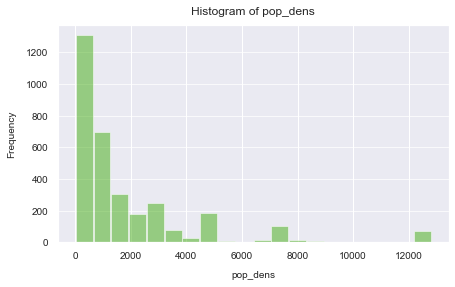

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['pop_dens'],   #this is a bin-element (breite der balken)
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('pop_dens', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of pop_dens', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

#### Create a plot with the locations of supermarkets in different colors according to their brand.

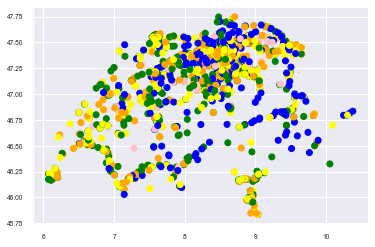

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and select variables
df = pd.read_csv("supermarkets_data_enriched.csv")[[ 'id',
                                                    'brand',
                                                    'lat',
                                                    'lon',
                                                    'pop',
                                                    'pop_dens',
                                                    'frg_pct',
                                                    'emp']]

# Subset
df_sub = df.loc[df['brand'].isin(['Coop','Migros', 'Denner', 'Volg', 'Landi'])]
df_sub

# Colors
colors = {'Coop': 'green', 'Migros': 'orange','Denner': 'yellow', 'Volg': 'blue', 'Landi': 'pink'}

#Plot
plt.scatter(df_sub['lon'],
           df_sub['lat'],
            c=df_sub['brand'].map(colors))

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [38]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-01-21 17:09:47
Python Version: 3.9.7
-----------------------------------
